<a href="https://colab.research.google.com/github/stevengregori92/Learn-a-bit-about-KMeans/blob/main/Learn_a_bit_of_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.inspection import permutation_importance

#Import Data

In [ ]:
data = pd.read_csv('sales_dataset.csv')
data

,marketing_budget(thousands),actual_sales(millions)
0,187.86,12.14
1,138.13,12.33
2,177.89,8.41
3,181.13,8.90
4,151.50,12.57
...,...,...
217,181.34,10.60
218,147.05,9.01
219,192.21,11.90
220,191.22,8.36


#Explore Data

In [ ]:
len(data), len(data.dropna())

(222, 222)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marketing_budget(thousands)  222 non-null    float64
 1   actual_sales(millions)       222 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB


#Analyze Data

In [ ]:
X = data

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
y_predicted = kmeans.fit_predict(data[['marketing_budget(thousands)', 'actual_sales(millions)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
data['cluster'] = y_predicted
data.head()

,marketing_budget(thousands),actual_sales(millions),cluster
0,187.86,12.14,1
1,138.13,12.33,1
2,177.89,8.41,1
3,181.13,8.90,1
4,151.50,12.57,1


<Axes: xlabel='marketing_budget(thousands)', ylabel='actual_sales(millions)'>

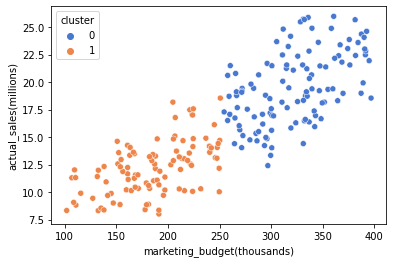

In [ ]:
sns.scatterplot(data= data, x = 'marketing_budget(thousands)', y = 'actual_sales(millions)', hue = 'cluster', palette="muted")

In [ ]:
stand = StandardScaler()
stand.fit(data[['actual_sales(millions)']])
data['actual_sales(millions)'] = stand.fit_transform(np.array(data['actual_sales(millions)']).reshape(-1, 1))
data

,marketing_budget(thousands),actual_sales(millions),cluster
0,187.86,-0.851941,1
1,138.13,-0.810890,1
2,177.89,-1.657819,1
3,181.13,-1.551953,1
4,151.50,-0.759038,1
...,...,...,...
217,181.34,-1.184663,1
218,147.05,-1.528187,1
219,192.21,-0.903793,1
220,191.22,-1.668622,1


In [ ]:
stand.fit(data[['marketing_budget(thousands)']])
data['marketing_budget(thousands)'] = stand.fit_transform(np.array(data['marketing_budget(thousands)']).reshape(-1, 1))
data

,marketing_budget(thousands),actual_sales(millions),cluster
0,-0.896124,-0.851941,1
1,-1.531550,-0.810890,1
2,-1.023516,-1.657819,1
3,-0.982117,-1.551953,1
4,-1.360715,-0.759038,1
...,...,...,...
217,-0.979434,-1.184663,1
218,-1.417575,-1.528187,1
219,-0.840542,-0.903793,1
220,-0.853192,-1.668622,1


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
y_predicted = kmeans.fit_predict(data[['marketing_budget(thousands)', 'actual_sales(millions)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
data['cluster'] = y_predicted
data.head()

,marketing_budget(thousands),actual_sales(millions),cluster
0,-0.896124,-0.851941,1
1,-1.531550,-0.810890,1
2,-1.023516,-1.657819,1
3,-0.982117,-1.551953,1
4,-1.360715,-0.759038,1


<Axes: xlabel='marketing_budget(thousands)', ylabel='actual_sales(millions)'>

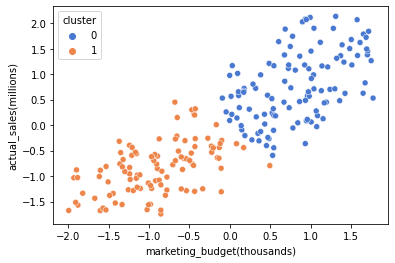

In [ ]:
sns.scatterplot(data= data, x = 'marketing_budget(thousands)', y = 'actual_sales(millions)', hue = 'cluster', palette="muted")